<a href="https://colab.research.google.com/github/susanthks/susanthks/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [6]:
#load dataframe (csv file) and rename columns properly
df=pd.read_csv("owid-covid-data.csv")
df.describe()
df.drop(['new_deaths_smoothed','new_cases_per_million',],axis=1,inplace=True)
df.shape
df.rename(columns={'date': 'Date','location':'Country','continent': 'Continent','iso_code':'ISO_code'},inplace=True)
df.head()

,ISO_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#list the continent name
cont_list=list(df.Continent.unique())
cont_list

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [9]:
#simple imputer helps to replace missing value with constant value
imputer=SimpleImputer(strategy='constant')
df0=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [10]:
#groupby helps to form a subset of data by dividing our data into different group and perform data analysis
df1=df0.groupby(['Date','Country'])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()
df1

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value
...,...,...,...,...,...
211361,2022-08-25,Wallis and Futuna,761.0,7.0,missing_value
211362,2022-08-25,World,599293387.0,6481405.0,12520277066.0
211363,2022-08-25,Yemen,11922.0,2155.0,missing_value
211364,2022-08-25,Zambia,332710.0,4016.0,missing_value


In [11]:
#simple imputer place missing values by a constant value replacing the constant value to zero
df1['total_cases'].replace({'missing_value':0},inplace=True)
df1['total_deaths'].replace({'missing_value':0},inplace=True)
df1['total_vaccinations'].replace({'missing_value':0},inplace=True)
df1

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Argentina,0.0,0.0,0.000000e+00
...,...,...,...,...,...
211361,2022-08-25,Wallis and Futuna,761.0,7.0,0.000000e+00
211362,2022-08-25,World,599293387.0,6481405.0,1.252028e+10
211363,2022-08-25,Yemen,11922.0,2155.0,0.000000e+00
211364,2022-08-25,Zambia,332710.0,4016.0,0.000000e+00


In [12]:
#finding total countries where total_deaths greaterthan 1 lakh
df2=df1[df1['total_deaths']>1000000]
countries=df2['Country'].unique()
len(countries)

10

In [13]:
#listing of countries total death greaterthan 1 lakh
country_death_greaterthan1000000=list(df2.Country.unique())
country_death_greaterthan1000000

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

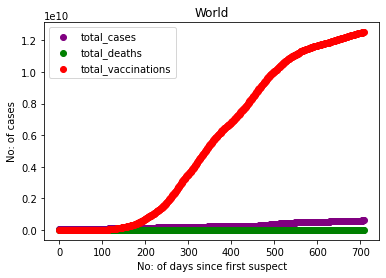

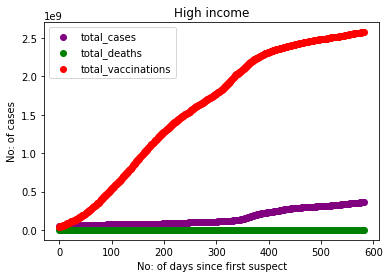

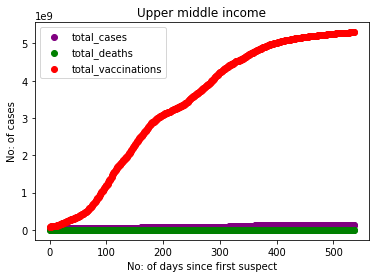

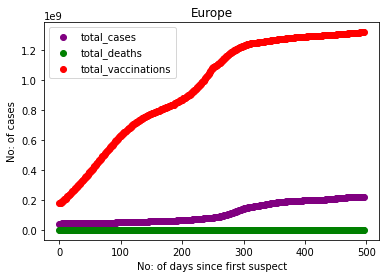

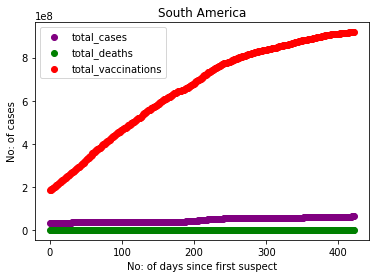

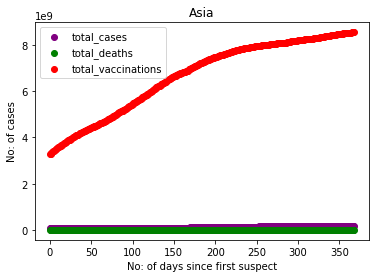

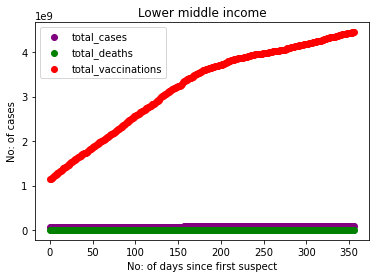

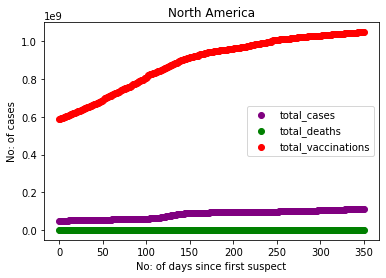

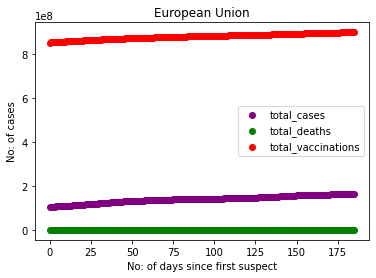

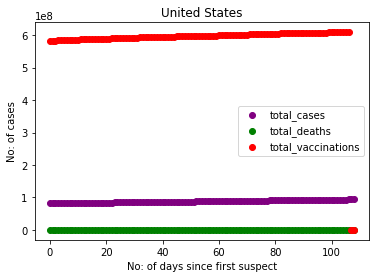

In [14]:
#we need to show the trend of 10 counries listed above so use for loop to get the 10 countries graph
for i in range(0,len(countries)):
    C=df2[df2['Country']==countries[i]]
    plt.scatter(np.arange(0,len(C)),C['total_cases'],color='purple',label='total_cases')
    plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='green',label='total_deaths')
    plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color='red',label='total_vaccinations')
    plt.title(countries[i])
    plt.xlabel("No: of days since first suspect")
    plt.ylabel("No: of cases")
    plt.legend()
    plt.show()

In [15]:
df3=df2.groupby(['Country'])[['total_cases','total_deaths']].sum().reset_index()
df3

,Country,total_cases,total_deaths
0,Asia,4.322164e+10,4.842530e+08
1,Europe,5.752850e+10,7.479506e+08
2,European Union,2.604243e+10,2.014204e+08
3,High income,9.502330e+10,1.095145e+09
4,Lower middle income,2.799053e+10,4.388799e+08
5,North America,2.924031e+10,4.618589e+08
6,South America,2.013995e+10,5.145465e+08
7,United States,9.591880e+09,1.111513e+08
8,Upper middle income,4.796892e+10,1.105675e+09
9,World,1.886061e+11,3.022378e+09


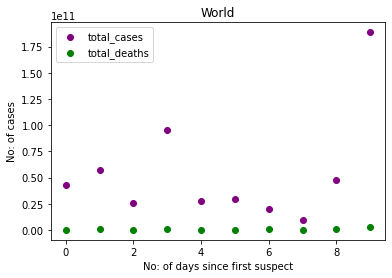

In [16]:
C=df3
plt.scatter(np.arange(0,len(C)),C['total_cases'],color='purple',label='total_cases')
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='green',label='total_deaths')
plt.title('World')
plt.xlabel('No: of days since first suspect')
plt.ylabel('No: of cases')
plt.legend()
plt.show()

In [17]:
date=df2['Date'].unique()
len(date)

709

In [18]:
df4=df2.groupby(['Date'])[['total_cases','total_deaths']].sum().reset_index()
df4

,Date,total_cases,total_deaths
0,2020-09-16,2.992935e+07,1004609.0
1,2020-09-17,3.024481e+07,1010258.0
2,2020-09-18,3.057141e+07,1016111.0
3,2020-09-19,3.086466e+07,1021380.0
4,2020-09-20,3.111979e+07,1025367.0
...,...,...,...
704,2022-08-21,2.018080e+09,21270546.0
705,2022-08-22,2.020527e+09,21274826.0
706,2022-08-23,2.023451e+09,21284668.0
707,2022-08-24,2.026156e+09,21294865.0


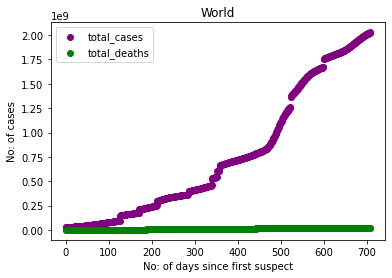

In [19]:
C=df4
plt.scatter(np.arange(0,len(C)),C['total_cases'],color='purple',label='total_cases')
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='green',label='total_deaths')
plt.title('World')
plt.xlabel('No: of days since first suspect')
plt.ylabel('No: of cases')
plt.legend()
plt.show()